In [63]:
# Author: Kerem Kazan
# Title: Chess Commentator Transformer - Post-Analysis

This project ran multiple training runs with different hyperparameters and tokenization schemes. Below is a statistical summary of the results.

In [64]:
# We will now take a look at the results of our training. Let's first organize the results:

import json

def load_training_stats(path, title, params):
    with open(path, "r") as f:
        stats = json.load(f)
        log_history = stats["log_history"]

        # get log history items with eval_loss
        eval_loss_items = [item for item in log_history if "eval_loss" in item]
        train_loss_items = [item for item in log_history if "loss" in item]
        return {
          "title": title,
          "params": params,
          "stats_raw": stats,
          "eval_loss": eval_loss_items,
          "train_loss": train_loss_items,
        }

board_after_overfit = load_training_stats(
  "training_stats/board_after_overfit.json", 
  "Board After Overfit",
  {
    "batch_size": 128,
    "encoder_dim": 768,
    "encoder_num_layers": 12,
    "encoder_num_heads": 12,
    "encoder_intermediate_size": 768 * 4,
    "decoder_dim": 768,
    "decoder_num_layers": 12,
    "decoder_num_heads": 12,
  }
)

simple_transformer_underfit = load_training_stats(
  "training_stats/simple_transformer_underfit.json", 
  "Simple Transformer Underfit",
  {
    "batch_size": 64,
    "encoder_dim": 256,
    "encoder_num_layers": 6,
    "encoder_num_heads": 8,
    "encoder_intermediate_size": 256 * 4,
    "decoder_dim": 256,
    "decoder_num_layers": 6,
    "decoder_num_heads": 8,
  }
)

simple_transformer_overfit = load_training_stats(
  "training_stats/simple_transformer_overfit.json", 
  "Simple Transformer Overfit",
  {
    "batch_size": 128,
    "encoder_dim": 768,
    "encoder_num_layers": 12,
    "encoder_num_heads": 12,
    "encoder_intermediate_size": 768 * 4,
    "decoder_dim": 768,
    "decoder_num_layers": 12,
    "decoder_num_heads": 12,
  }
)

In [83]:
import matplotlib.pyplot as plt

def plot_loss(stats, ax):
    eval_loss = [(item["eval_loss"], item["step"]) for item in stats["eval_loss"]]
    train_loss = [(item["loss"], item["step"]) for item in stats["train_loss"]]

    ax.plot([x[1] for x in eval_loss], [x[0] for x in eval_loss], label="Eval Loss")
    ax.plot([x[1] for x in train_loss], [x[0] for x in train_loss], label="Train Loss")
    ax.legend()
    ax.set_title(stats["title"])
    ax.set_xlabel("Step")
    ax.set_ylabel("Loss")

    ax.text(0.05, 0.95, f"Batch Size: {stats['params']['batch_size']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.90, f"Encoder Dim: {stats['params']['encoder_dim']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.85, f"Decoder Dim: {stats['params']['decoder_dim']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.80, f"Encoder Num Layers: {stats['params']['encoder_num_layers']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.75, f"Decoder Num Layers: {stats['params']['decoder_num_layers']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.70, f"Encoder Num Heads: {stats['params']['encoder_num_heads']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    ax.text(0.05, 0.65, f"Decoder Num Heads: {stats['params']['decoder_num_heads']}", transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.5))
    

def plot_results():
  # Create figure with 3 subplots in a row
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  fig.suptitle("Training and Evaluation Loss Over Time", fontsize=16)

  # Plot each model's loss
  plot_loss(simple_transformer_underfit, axes[0])
  plot_loss(simple_transformer_overfit, axes[1])
  plot_loss(board_after_overfit, axes[2])

  # Add more padding between subplots
  plt.subplots_adjust(wspace=0.3)
  plt.show()


# Results

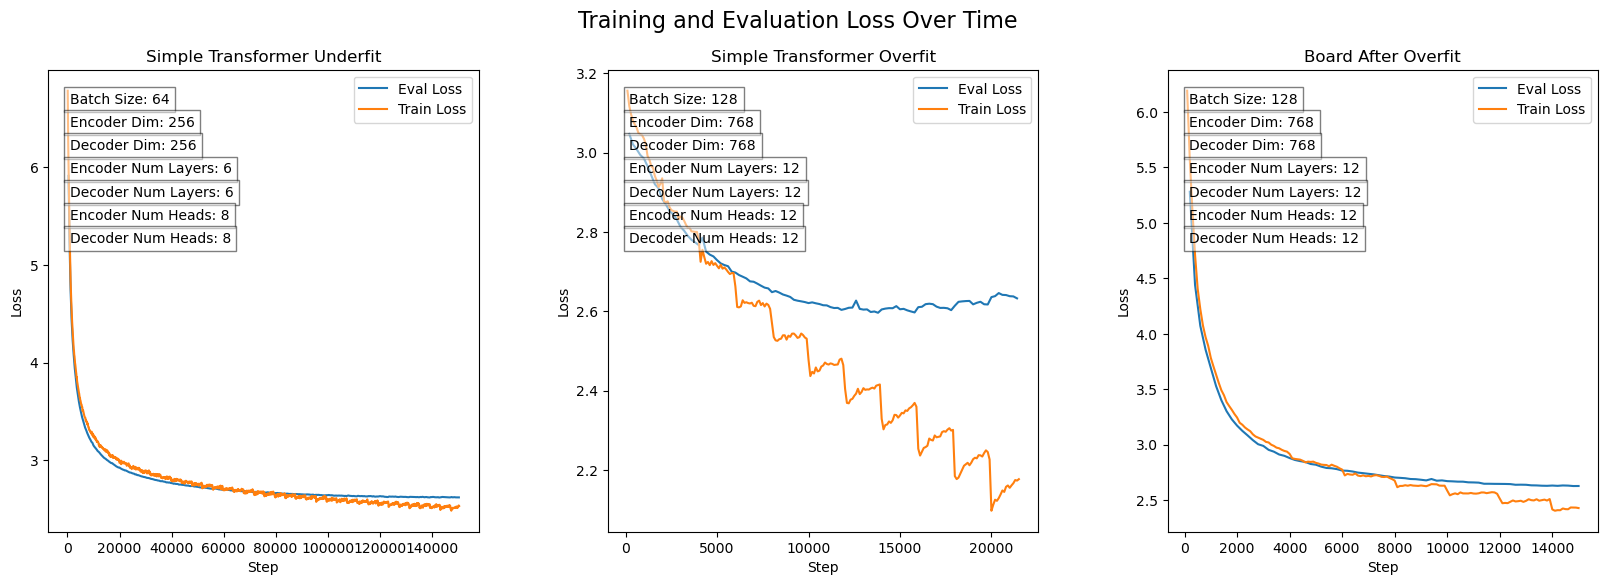

In [84]:
plot_results()

## Run 1 - Alias: Simple Transformer Underfit

The first plot's original run can be found here: https://colab.research.google.com/drive/1tCtRpZRnNv6Ta6qG9ZFcOab-E2_0NbpW?usp=sharing. This is the analysis of the exact strategy used in the previous notebook. It shows a very healthy training curve - which took many hours and close to 150k steps to complete. We can see that training loss started dominating the eval loss at around 100k steps - but the difference isn't too big. I consider this run a success. Upon inspecting the actual generated comments, I noticed that there was more room for improvement. So I ran the same model by basically doubling everything, which resulted in the second plot.

## Run 2 - Alias: Simple Transformer Overfit

Original run: https://colab.research.google.com/drive/10rTpBn8lPTQl8jFBpgEjjwZj0viPjYFF?usp=sharing

This one shows a dramatic overfit pattern that shows up pretty quickly. This run was an obvious failure - but it was worth a shot.

## Run 3 - Alias: "Board-After" Overfit

Original run: https://colab.research.google.com/drive/1JB2Bywfugo1LjaeJtRzLdGnkCGRagq4-?usp=sharing

This one uses a different tokenization scheme. Instead of tokenizing the input as BOARD + MOVE sequences, it ignores the move sequence and tokenizes the board both before and after the move - in an attempt to capture the shift in the board position. This too was an overfit - but it was much better than the previous one. This run was also a failure - but I believe there's merit to this strategy - and it should be explored further.
